## Introduction

Here is an experiment on our annotated Solar Panel Dataset using Faster R-CNN (Region-based Convolutional Neural Network) with ResNet-50 as the backbone, specifically `fasterrcnn_resnet50_fpn_v2`. Faster R-CNN with ResNet-50 is a powerful deep learning model for object detection tasks, known for its balance between accuracy and computational efficiency. In this experiment, we aim to detect and localize solar panels within thermal images.

## Dataset Overview

The annotated Solar Panel Dataset used in this experiment consists of over 1500 thermal images of solar panels. These images are labeled for object detection tasks and are divided into five distinct classes:

1. **Cell**: Represents individual solar cells within a solar panel.
2. **Cell-Multi**: Denotes multiple solar cells within a single panel.
3. **No-Anomaly**: Indicates areas of the solar panel without any anomalies or issues.
4. **Shadowing**: Refers to shadows cast on the solar panel surface.
5. **Unclassified**: Represents regions that cannot be classified into the above categories.

The dataset is split into three subsets for training, validation, and testing purposes:

- **Training Set**: Contains images located in the directory `../train/images`.
- **Validation Set**: Consists of images located in the directory `../valid/images`.
- **Test Set**: Comprises images located in the directory `../test/images`.

## Experimental Approach

1. **Cloning the Git Repository**: Prior to conducting the experiment, the Git repository containing the necessary code and configurations will be cloned to the local environment.
2. **Training Faster R-CNN with ResNet-50 Backbone**: The Faster R-CNN model with ResNet-50 as the backbone (`fasterrcnn_resnet50_fpn_v2`) will be trained on the annotated Solar Panel Dataset using the training subset. During training, the model will learn to identify and localize solar panels across the different classes.
3. **Validation and Testing**: After training, the model's performance will be evaluated on the validation and test sets to assess its ability to generalize to unseen data and detect solar panels accurately.
4. **Analysis and Results**: Finally, the results of the experiment will be analyzed to determine the effectiveness of Faster R-CNN with ResNet-50 for solar panel detection tasks. This analysis may include metrics such as precision, recall, and mean average precision (mAP).

## What our final aim is:

Through this experiment, we aim to demonstrate the effectiveness of Faster R-CNN with ResNet-50 as the backbone for solar panel detection and provide insights into the performance of the model on our annotated dataset.


In [2]:
!git clone https://github.com/nabinsharmaUTS/ObjectDetection-FasterRCNN.git

Cloning into 'ObjectDetection-FasterRCNN'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 127 (delta 60), reused 123 (delta 58), pack-reused 0
Receiving objects: 100% (127/127), 4.26 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [3]:
pwd

'/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN'

In [11]:
%cd /root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN

/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN


In [7]:
# Install the Requirements
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
%cd /root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN/data

/root/42028/AT3/ObjectDetection-FasterRCNN/data


## Downloading the Dataset


In [3]:
#!cd ObjectDetection-FasterRCNN
!pwd
!unzip /root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN/data/data.zip;


/root/42028/AT3/ObjectDetection-FasterRCNN/data
Archive:  /root/42028/AT3/ObjectDetection-FasterRCNN/data/data.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/100_png_jpg.rf.ebdfff6e60da19fd5571ef0c44323982.jpg  
 extracting: test/100_png_jpg.rf.ebdfff6e60da19fd5571ef0c44323982.xml  
 extracting: test/91_png_jpg.rf.3d8f9e53fea3e7cfdd6c9d2d7eb8f964.jpg  
 extracting: test/91_png_jpg.rf.3d8f9e53fea3e7cfdd6c9d2d7eb8f964.xml  
 extracting: test/92_png_jpg.rf.d8a6313c02347a45fdcefc2d6fffc4fb.jpg  
 extracting: test/92_png_jpg.rf.d8a6313c02347a45fdcefc2d6fffc4fb.xml  
 extracting: test/93_png_jpg.rf.217f57f577ab47618a3fb80310851028.jpg  
 extracting: test/93_png_jpg.rf.217f57f577ab47618a3fb80310851028.xml  
 extracting: test/94_png_jpg.rf.d7f43d90cdbcc4456d7e9d1934a65264.jpg  
 extracting: test/94_png_jpg.rf.d7f43d90cdbcc4456d7e9d1934a65264.xml  
 extracting: test/95_png_jpg.rf.2b57139b324096fa385cff56e277eec8.jpg  
 extrac

In [7]:
%cd ..

/root/42028/AT3/ObjectDetection-FasterRCNN


## Create the Custom Dataset YAML File.

In [13]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'data/train'
TRAIN_DIR_LABELS: 'data/train'
VALID_DIR_IMAGES: 'data/valid'
VALID_DIR_LABELS: 'data/valid'

# Class names.
CLASSES: [
    '__background__',
    'Cell',
    'Cell-Multi',
    'No-Anomaly',
    'Shadowing',
    'Unclassified',
    
    
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


## We will check the distribution of each class label by searching for it in the corresponding XML

In [5]:
import os
import xml.etree.ElementTree as ET

# Define the class names
class_names = ['Cell', 'Cell-Multi', 'No-Anomaly', 'Shadowing', 'Unclassified']

# Dictionary to store the count of each class
class_counts = {class_name: 0 for class_name in class_names}

# Path to the folder containing our image set
data_folder = 'data/train'

# Iterating through each XML file in the folder
for filename in os.listdir(data_folder):
    if filename.endswith('.xml'):
        # Parse XML file
        tree = ET.parse(os.path.join(data_folder, filename))
        root = tree.getroot()

        # Find all 'object' elements
        object_elements = root.findall('.//object')

        # Count the occurrences of each class name
        for obj in object_elements:
            name_element = obj.find('name')
            if name_element is not None:
                class_name = name_element.text.strip()
                if class_name in class_counts:
                    class_counts[class_name] += 1
                    break  # There are multiple name tags in the xml. We only need one. 

# Print the distribution of classes
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Cell: 30
Cell-Multi: 26
No-Anomaly: 521
Shadowing: 85
Unclassified: 55


## Class Imbalance and Training Faster R-CNN with ResNet-50

Class imbalance, as seen in our dataset, where "No-Anomaly" has significantly more samples than others, can lead to biased models, reduced performance for minority classes, and difficulty in learning discriminative features.

To address this:

- **Data Augmentation**: Use techniques like rotation, scaling, and flipping to augment minority class samples.
  
- **Class Weighting**: Assign higher weights to minority classes during training.
  

But the difference in the number of samples in No-Anomaly is so large that assigning Class Weights might not be an ideal. Also, in the assignment brief, we were asked to keep the split the same as what is already given in the train and val sets. 


## Quick scan at the data from each class




Displaying image for class Cell-Multi


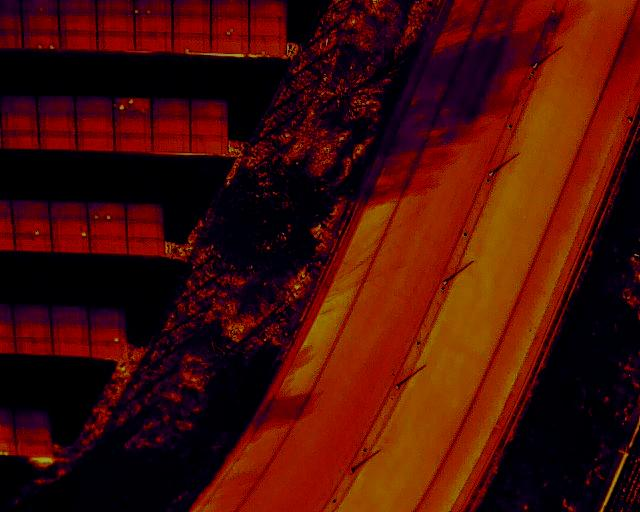

Displaying image for class No-Anomaly


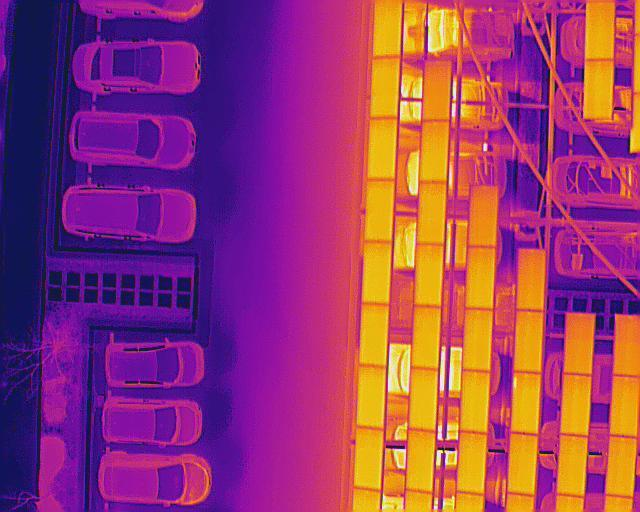

Displaying image for class Unclassified


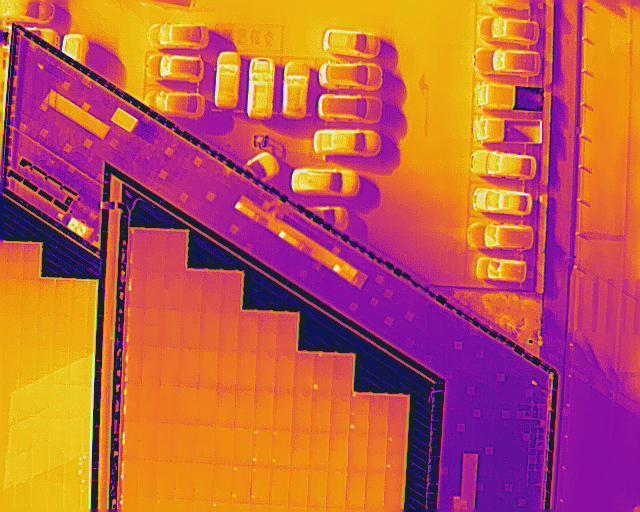

Displaying image for class Shadowing


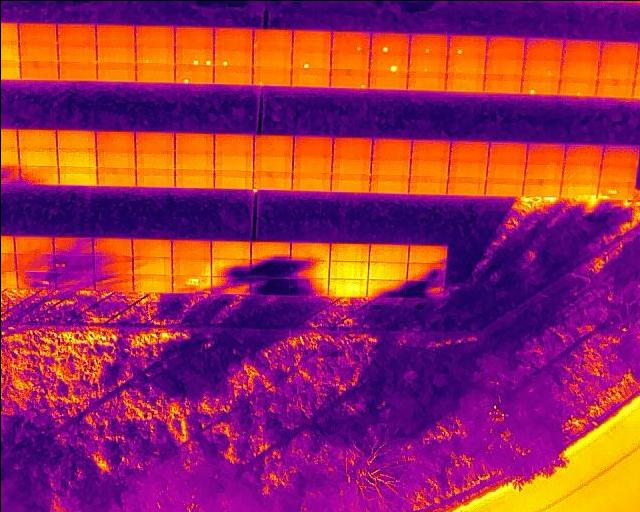

Displaying image for class Cell


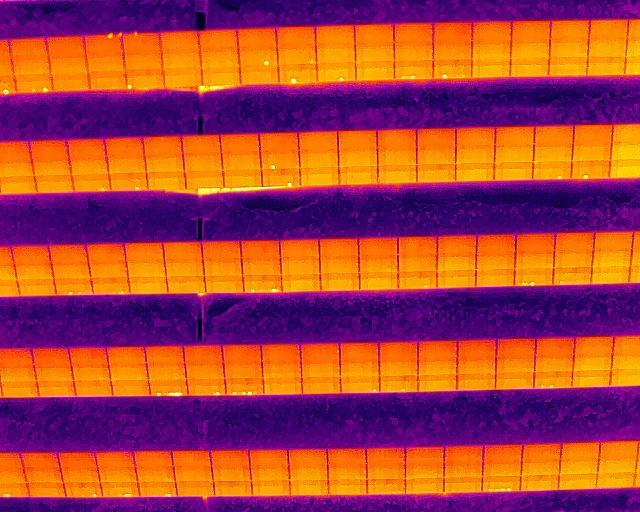

In [18]:
import os
from PIL import Image
import xml.etree.ElementTree as ET


# Define the class names
class_names = ['Cell', 'Cell-Multi', 'No-Anomaly', 'Shadowing', 'Unclassified']

# Dictionary to store the count of each class
class_counts = {class_name: 0 for class_name in class_names}

# Path to the folder containing our image set
data_folder = 'data/train'

# Dictionary to store the filename of the image for each class
class_images = {}

# Iterating through each XML file in the folder
for filename in os.listdir(data_folder):
    if filename.endswith('.xml'):
        # Parse XML file
        tree = ET.parse(os.path.join(data_folder, filename))
        root = tree.getroot()

        # Find all 'object' elements
        object_elements = root.findall('.//object')

        # Iterate through each object and extract class name
        for obj in object_elements:
            name_element = obj.find('name')
            if name_element is not None:
                class_name = name_element.text.strip()
                if class_name in class_names and class_name not in class_images:
                    # Found a new class, store the corresponding XML filename
                    class_images[class_name] = filename
                    break  # Stop searching for additional name elements within this object

# Load and display one image per class using PIL
for class_name, xml_filename in class_images.items():
    # Construct image filename
    img_filename = os.path.splitext(xml_filename)[0] + '.jpg'
    img_path = os.path.join(data_folder, img_filename)
    if os.path.exists(img_path):
        print(f"Displaying image for class {class_name}")
        # Load and display the image using PIL
        img = Image.open(img_path)
        img.show()
    else:
        print(f"No image found for class {class_name}")


## Annotating Data

There are a few images without annotation, annotating data may not be feasible as well. This task requires expertise from subject matter experts, as annotating images through visual inspection alone may not get us desired outcomes. 

## Training

In [12]:
!wandb disabled

W&B disabled.


## Training

Train Faster R-CNN with ResNet-50 backbone on custom solar panel dataset for 100 epochs, using batch size of 2 and disabling mosaic augmentation, while setting seed to 42.

Batch size of 2 is chosen for training on PyTorch 3.8 GPU ml.g4dn.xlarge to balance memory utilization and computational efficiency, ensuring optimal performance without exceeding GPU memory constraints.



In [14]:
pwd

'/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN'

In [ ]:
!python train.py --config data_configs/custom_data.yaml --epochs 100 --model fasterrcnn_resnet50_fpn_v2 --project-name solarpaneldetector --batch-size 2 --no-mosaic --seed 42 

Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1167
Number of validation samples: 250

Building model from scratch...
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         [100, 4]                  --
├─GeneralizedRCNNTransform: 1-1                    [2, 3, 800, 800]          --
├─BackboneWithFPN: 1-2                             [2, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1                [2, 2048, 25, 25]         --
│    │    └─Conv2d: 3-1                            [2, 64, 400, 400]         (9,408)
│    │    └─BatchNorm2d: 3-2                       [2, 64, 400, 400]         (128)
│    │    └─ReLU: 3-3                              [2, 64, 400, 400]         --
│    │    └─MaxPool2d: 3-4                         [2, 64, 200, 200]         --
│    │    └─Sequential: 3-5                        [2, 256, 200, 200]        (215,808)
│    │    └─Sequenti

In [ ]:
#!python train.py --config data_configs/custom_data.yaml --epochs 25 --model fasterrcnn_resnet50_fpn_v2 --project-name dryfruits --batch-size 2 --no-mosaic

## Visualize Validation Results

In [4]:
import matplotlib.pyplot as plt
import glob as glob

In [8]:
pwd

'/root/42028/AT3/ObjectDetection-FasterRCNN'

## Evaluation

In [4]:
# No verbose mAP.
!python eval.py --weights outputs/training/solarpaneldetector/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

100%|███████████████████████████████████████████| 32/32 [00:33<00:00,  1.06s/it]


{'classes': tensor([1, 2, 3, 4, 5], dtype=torch.int32),
 'map': tensor(0.5027),
 'map_50': tensor(0.6226),
 'map_75': tensor(0.6049),
 'map_large': tensor(-1.),
 'map_medium': tensor(0.8092),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.3625),
 'mar_1': tensor(0.0794),
 'mar_10': tensor(0.3340),
 'mar_100': tensor(0.5389),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(-1.),
 'mar_medium': tensor(0.8515),
 'mar_small': tensor(0.3926)}



The model achieved a mean average precision (mAP) of 50.27% across all classes, with mAP@50% intersection over union (IoU) of 62.26% and mAP@75% IoU of 60.49%. It performed best on medium-sized objects with an mAP of 80.92%, while performance on small-sized objects was lower with an mAP of 36.25%. The mean average recall (mAR) at 1, 10, and 100 detections per image was 7.94%, 33.40%, and 53.89% respectively, indicating moderate performance in detecting objects across different thresholds.


In [5]:
# Verbose mAP.
!python eval.py --weights outputs/training/solarpaneldetector/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

100%|███████████████████████████████████████████| 32/32 [00:33<00:00,  1.06s/it]


{'classes': tensor([1, 2, 3, 4, 5], dtype=torch.int32),
 'map': tensor(0.5027),
 'map_50': tensor(0.6226),
 'map_75': tensor(0.6049),
 'map_large': tensor(-1.),
 'map_medium': tensor(0.8092),
 'map_per_class': tensor([0.3886, 0.2899, 0.5584, 0.5148, 0.7619]),
 'map_small': tensor(0.3625),
 'mar_1': tensor(0.0794),
 'mar_10': tensor(0.3340),
 'mar_100': tensor(0.5389),
 'mar_100_per_class': tensor([0.4181, 0.3107, 0.6035, 0.5572, 0.8052]),
 'mar_large': tensor(-1.),
 'mar_medium': tensor(0.8515),
 'mar_small': tensor(0.3926)}


("Classes: ['__background__', 'Cell', 'Cell-Multi', 'No-Anomaly', 'Shadowing', "
 "'Unclassified']")


AP / AR per class
-------------------------------------------------------------------------
|    | Class                | AP                  | AR                  |
-------------------------------------------------------------------------
|1   | Cell                 | 0.389      

## Interpretation
Despite class imbalance, with 'No-Anomaly' having the most samples, the model performs moderately consitently overall. It's especially accurate at identifying areas without anomalies, but could improve in detecting 'Cell' and 'Cell-Multi' classes.

In [2]:
pwd

'/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN'

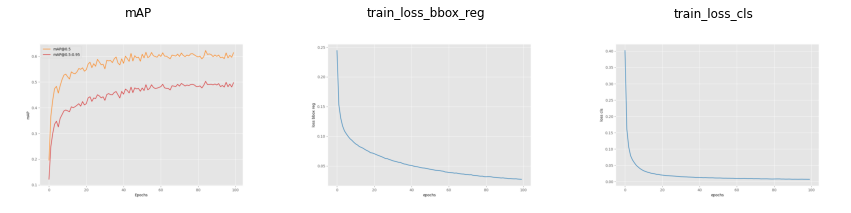

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Open the images
image1 = Image.open('/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN/outputs/training/solarpaneldetector/map.png')
image2 = Image.open('/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN/outputs/training/solarpaneldetector/train_loss_bbox_reg.png')
image3 = Image.open('/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN/outputs/training/solarpaneldetector/train_loss_cls.png')

# Convert the images to numpy arrays
image1 = np.asarray(image1)
image2 = np.asarray(image2)
image3 = np.asarray(image3)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the images on each subplot
axs[0].imshow(image1)
axs[0].set_title('mAP')
axs[0].axis('off')

axs[1].imshow(image2)
axs[1].set_title('train_loss_bbox_reg')
axs[1].axis('off')

axs[2].imshow(image3)
axs[2].set_title('train_loss_cls')
axs[2].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)

# Display the figure
plt.show()

In [7]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline

## Interference

#### Running inference on one sample image. 


In [8]:
!python inference.py --input data/train/100003.jpg --weights outputs/training/solarpaneldetector/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "inference.py", line 211, in <module>
    main(args)
  File "inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



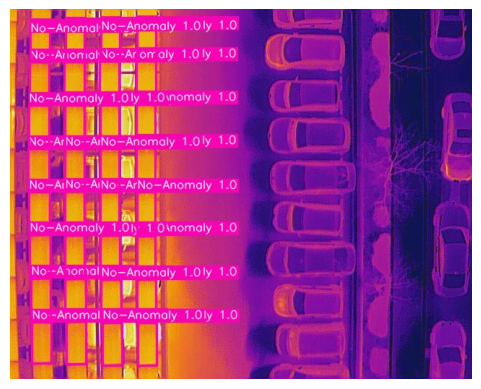

In [10]:
image = plt.imread('/root/42028/AT2/AT2-Part2/ObjectDetection-FasterRCNN/outputs/inference/res_4/100003.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()